In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Basic overview
print(df.shape)
print(df.info())
df.head()


(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


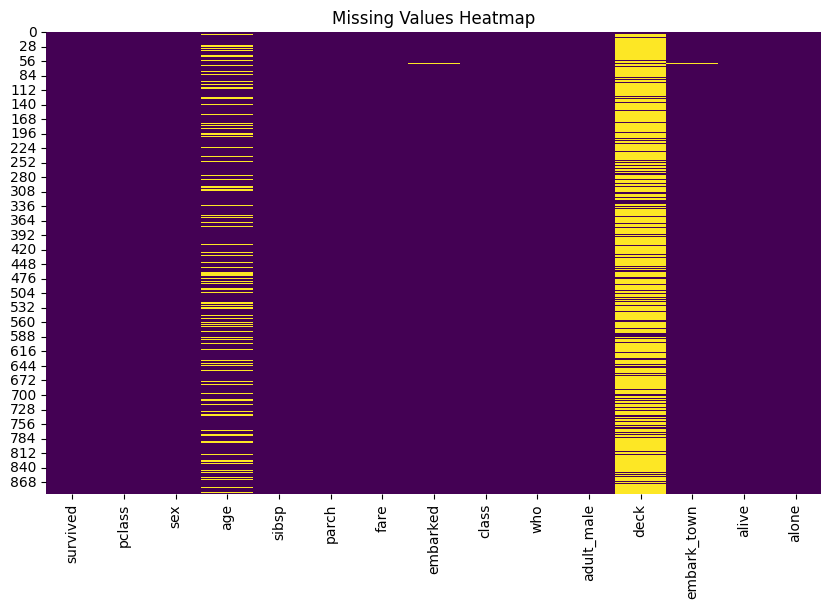

In [15]:
# Missing values count
print(df.isnull().sum())

# Visualizing missing data
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

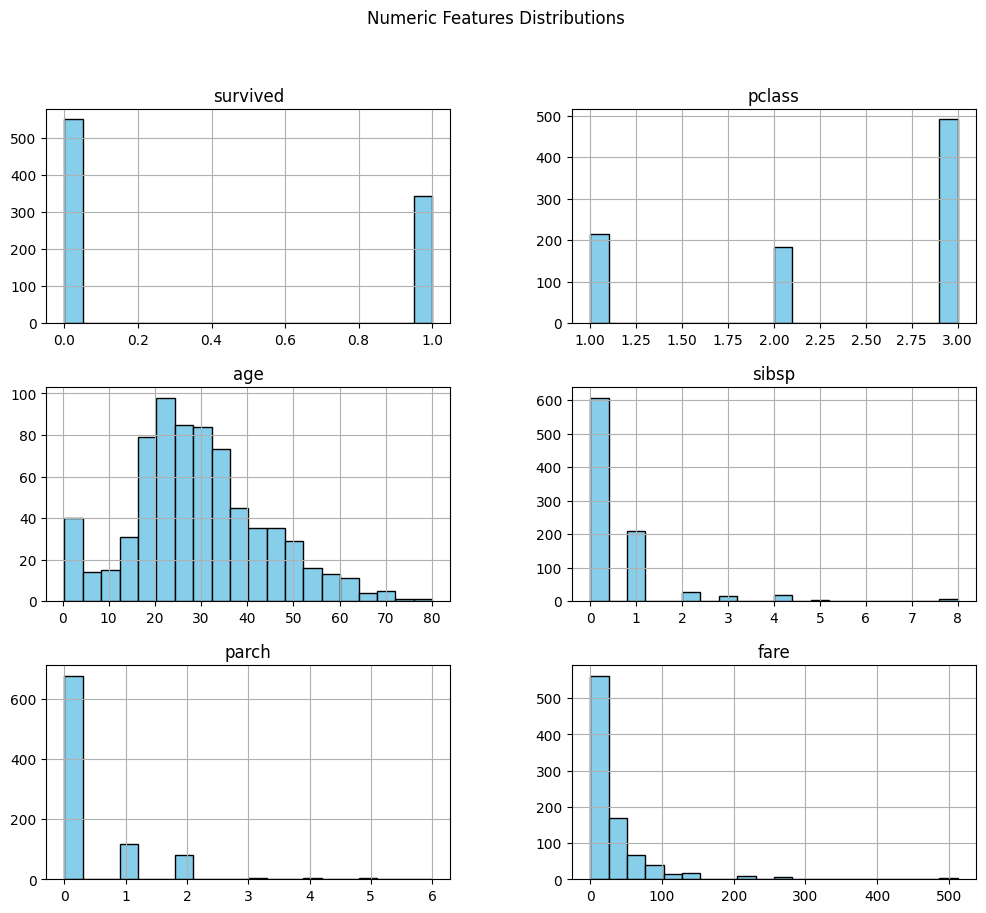

In [16]:
# Plot numeric distributions
df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Numeric Features Distributions')
plt.show()


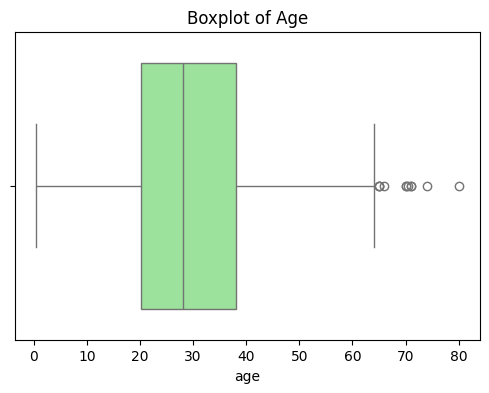

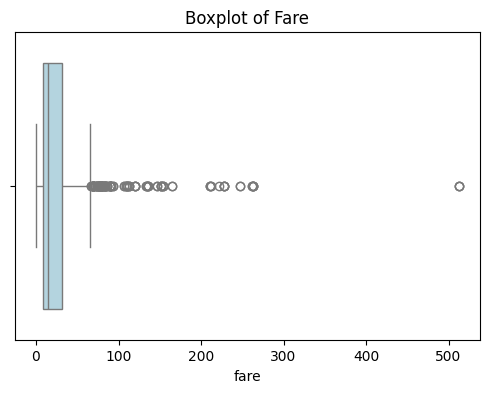

In [17]:
# Box plot for 'age' to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['age'], color='lightgreen')
plt.title('Boxplot of Age')
plt.show()

# Box plot for 'fare'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['fare'], color='lightblue')
plt.title('Boxplot of Fare')
plt.show()


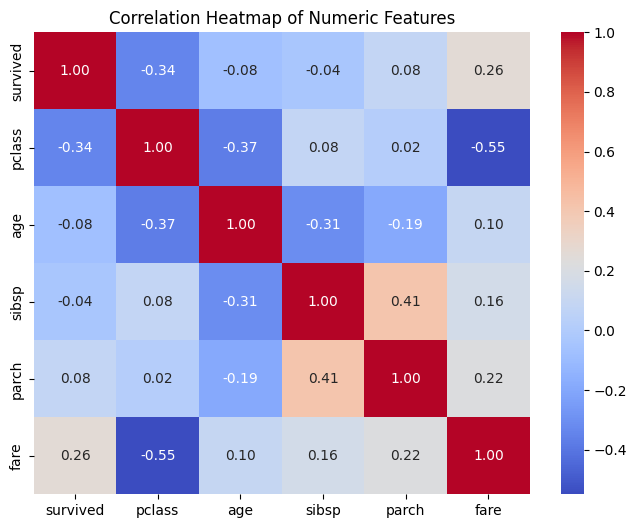

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute and plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


/tmp/ipython-input-19-268835435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='pastel')


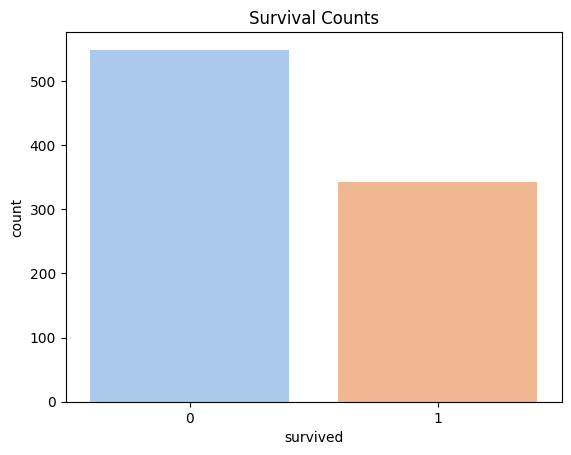

In [19]:
#Survival Distribution
sns.countplot(x='survived', data=df, palette='pastel')
plt.title('Survival Counts')
plt.show()


/tmp/ipython-input-20-1133828977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='pclass', data=df, palette='pastel')


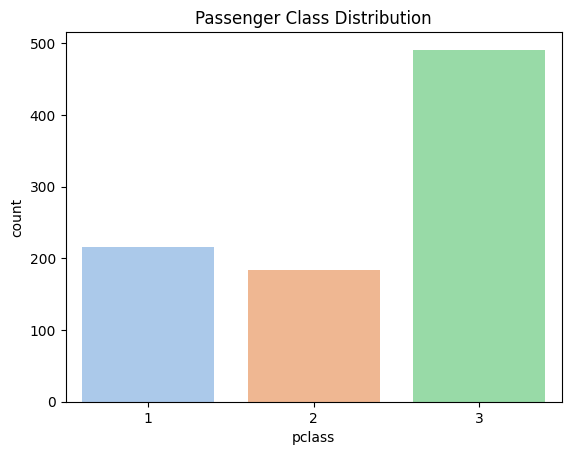

In [20]:
#Class Distribution
sns.countplot(x='pclass', data=df, palette='pastel')
plt.title('Passenger Class Distribution')
plt.show()


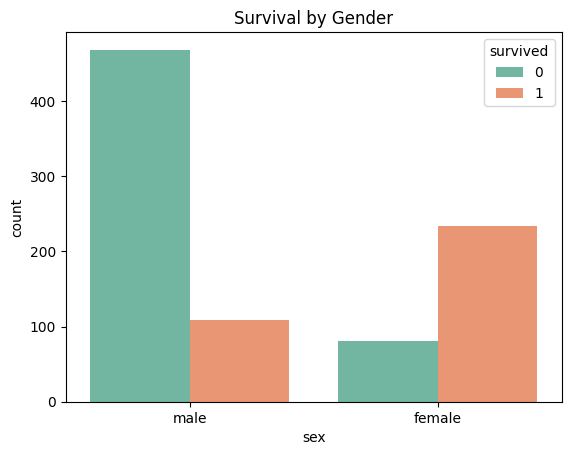

In [21]:
#Sex vs Survival
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title('Survival by Gender')
plt.show()


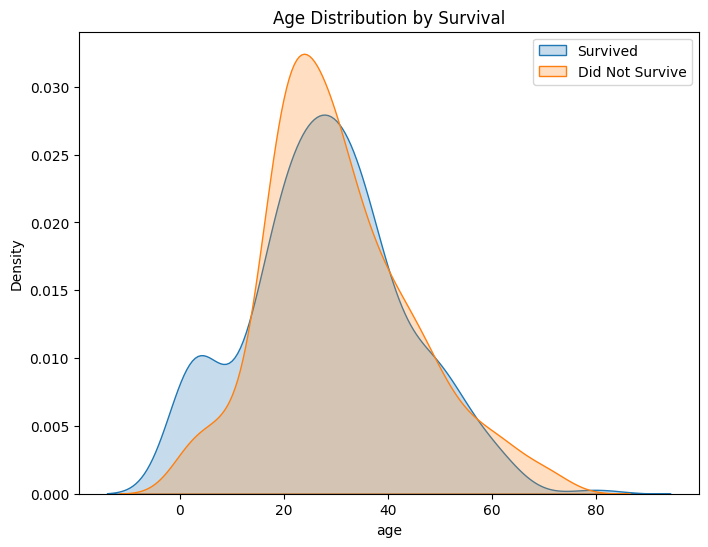

In [22]:
#Uncovering Relationships - Age vs Survival
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['survived']==1], x='age', label='Survived', fill=True)
sns.kdeplot(data=df[df['survived']==0], x='age', label='Did Not Survive', fill=True)
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()


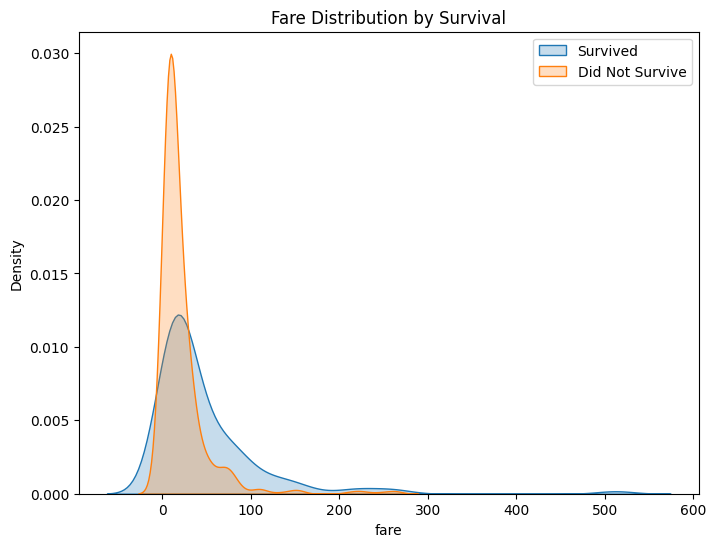

In [23]:
#Fare vs Survival
plt.figure(figsize=(8,6))
sns.kdeplot(data=df[df['survived']==1], x='fare', label='Survived', fill=True)
sns.kdeplot(data=df[df['survived']==0], x='fare', label='Did Not Survive', fill=True)
plt.title('Fare Distribution by Survival')
plt.legend()
plt.show()
